In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from xgboost.sklearn import XGBRegressor
import xgboost as xgb

import math
import seaborn as sns

# Regression for residential sector

In [2]:
residential_merged_dataset = pd.read_csv("Residential_regression_Merged-Dataset.csv")

In [3]:
residential_merged_dataset

,Year,Month,Cents/kWh,Year_Month,CLDD,TAVG,AWND,HTDD,area,AK,...,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels,Population,solar-generation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2014,1,17.49,2014.10,0.000000,21.879612,8.695349,1305.918033,664988,1,...,0.00,589929.95,16419.25,0.00,736283,0.0,0,0,0,1
1,2014,1,10.69,2014.10,0.000000,36.799074,6.456250,862.879630,52420,0,...,0.00,14290946.25,0.00,289349.53,4841799,0.0,0,0,0,1
2,2014,1,8.27,2014.10,0.000000,34.824272,7.872222,925.617647,53178,0,...,0.00,5638766.82,0.00,118451.33,2967392,0.0,0,0,0,1
3,2014,1,10.83,2014.10,0.324561,45.371930,4.735294,601.394737,113990,0,...,185578.77,9046791.30,29081.61,14920.86,6730413,34.0,0,0,0,1
4,2014,1,16.57,2014.10,5.453177,51.164214,4.103704,431.618729,163694,0,...,388107.97,15662855.12,606522.67,348637.91,38596972,126.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2019,12,19.17,2019.12,0.000000,23.542857,5.340000,1272.742857,9616,0,...,9607.00,203264.00,34590.00,40761.00,623651,4.0,0,0,0,1
3596,2019,12,9.47,2019.12,0.000000,34.460550,4.565517,939.321101,71298,0,...,1839.00,9257050.00,640575.00,126150.00,7698332,6.0,0,0,0,1
3597,2019,12,14.19,2019.12,0.000000,25.253801,7.783333,1220.421053,65496,0,...,3484.00,5312421.00,142151.00,81503.00,5836210,3.0,0,0,0,1
3598,2019,12,10.54,2019.12,0.000000,38.174242,6.009091,811.969231,24230,0,...,0.00,4734903.00,166097.00,0.00,1781015,1.0,0,0,0,1


In [4]:
pa_residential_data = residential_merged_dataset.loc[residential_merged_dataset['PA'] == 1]

In [5]:
pa_residential_data = pa_residential_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY', 'Coal', 'Geothermal',
       'Hydroelectric Conventional', 'Natural Gas', 'Nuclear', 'Other',
       'Other Biomass', 'Other Gases', 'Petroleum', 'Pumped Storage',
       'Solar Thermal and Photovoltaic', 'Total', 'Wind',
       'Wood and Wood Derived Fuels'], axis=1)
pa_residential_data

,Year,Month,Cents/kWh,Year_Month,CLDD,TAVG,AWND,HTDD,area,PA,residential_usage,Population,solar-generation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
37,2014,1,12.69,2014.10,0.000000,20.140601,8.033333,1382.917293,46055,1,6195.0,12788313,5.0,0,0,0,1
87,2014,2,13.37,2014.20,0.000000,23.232520,7.142308,1161.073171,46055,1,5663.0,12788022,6.0,0,0,0,1
137,2014,3,12.97,2014.30,0.000000,30.912950,8.615385,1048.841727,46055,1,5316.0,12787732,8.0,0,1,0,0
187,2014,4,13.06,2014.40,3.820144,48.134532,8.450000,507.323741,46055,1,4107.0,12787441,8.0,0,1,0,0
237,2014,5,13.20,2014.50,34.808511,59.490780,6.353846,204.695035,46055,1,3559.0,12787151,9.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,8,13.83,2019.80,192.609023,70.703008,4.780000,16.639098,46055,1,5248.0,12802611,29.0,0,0,1,0
3437,2019,9,14.02,2019.90,88.030534,66.169466,5.052000,53.175573,46055,1,4319.0,12802700,25.0,1,0,0,0
3487,2019,10,14.19,2019.10,21.700787,54.696850,6.572000,339.464567,46055,1,3570.0,12802789,20.0,1,0,0,0
3537,2019,11,14.07,2019.11,0.000000,37.236800,7.148000,825.040000,46055,1,3948.0,12802878,15.0,1,0,0,0


In [6]:
pa_residential_data.columns

Index(['Year', 'Month', 'Cents/kWh', 'Year_Month', 'CLDD', 'TAVG', 'AWND',
       'HTDD', 'area', 'PA', 'residential_usage', 'Population',
       'solar-generation', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [19]:
#split the data first

train, test = train_test_split(pa_residential_data, test_size=0.2)

X_train = train.drop(['Year', 'Month',  
                      'PA', 'residential_usage', 'Season_Spring', 'area', 'TAVG'], axis = 1)

y_train = train['residential_usage']

X_test = test.drop(['Year', 'Month', 'PA', 'residential_usage', 'Season_Spring', 'area', 'TAVG'], axis = 1)
y_test = test['residential_usage']

In [20]:
numeric_feature_name = ['Cents/kWh','CLDD', 'AWND', 'HTDD',
                        'Population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Season_Summer', 'Season_Fall', 'Season_Winter']

# scale the train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train[numeric_feature_name] = min_max_scaler.fit_transform(X_train[numeric_feature_name])
X_test[numeric_feature_name] = min_max_scaler.transform(X_test[numeric_feature_name])

y_train = (y_train - min(y_train))/(max(y_train) - min(y_train))

In [16]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
    
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

In [17]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

In [21]:
K = 5
model = XGBRegressor(objective ='reg:squarederror')
scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error', verbose=False)
avg_rmse = math.sqrt(abs(np.mean(scores)))

print('Average RMSE with {}-fold Cross Validation: {:.3f}'.format(K, avg_rmse))

Average RMSE with 5-fold Cross Validation: 0.122


In [ ]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(model, height=0.8, ax=ax)

In [ ]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    
    return df_pred

In [ ]:
sm_regression(X_train, y_train, X_test, y_test)

Mean Absolute Error: 371.2992720165341
Mean Squared Error: 210439.90868559928
Root Mean Squared Error: 458.7372981190861
MAPE: 7.819836378560506


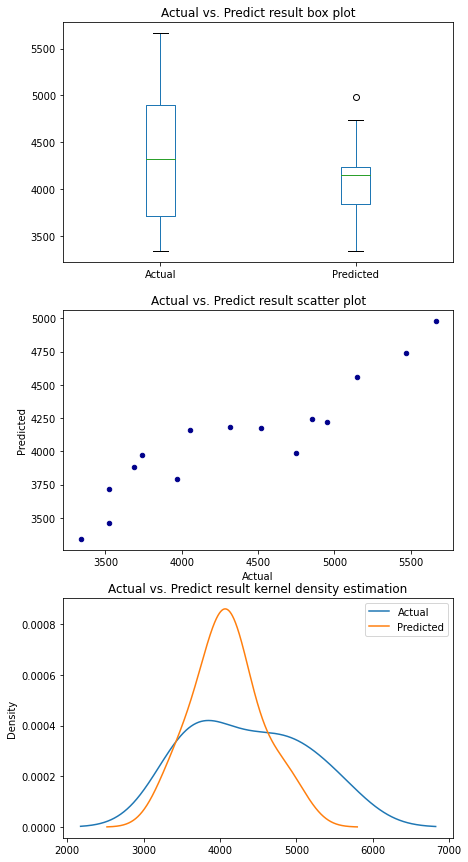

In [22]:
ind_lr = LinearRegression()
ind_lr.fit(X_train, y_train)
ind_predictions = ind_lr.predict(X_test)
ind_predictions = (ind_predictions * (max(y_test) - min(y_test))) + min(y_test)
evaluate_performances(y_test, ind_predictions)
ind_df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': ind_predictions})
visualize_graph(ind_df_pred)

In [24]:
ind_predictions

array([4244.76916402, 4218.1688034 , 4556.05817596, 3988.54077426,
       3460.61408033, 3884.30054976, 4979.1753223 , 3339.5710152 ,
       3795.13171755, 3718.20390954, 4178.93774233, 4172.72630751,
       4156.55067687, 3975.0138961 , 4736.02887956])

In [25]:
y_test

2837    4854.0
987     4951.0
1287    5149.0
2187    4749.0
1087    3526.0
1737    3686.0
87      5663.0
2037    3337.0
437     3971.0
1137    3523.0
1187    4319.0
1887    4516.0
2937    4055.0
2337    3738.0
1837    5467.0
Name: residential_usage, dtype: float64

In [12]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

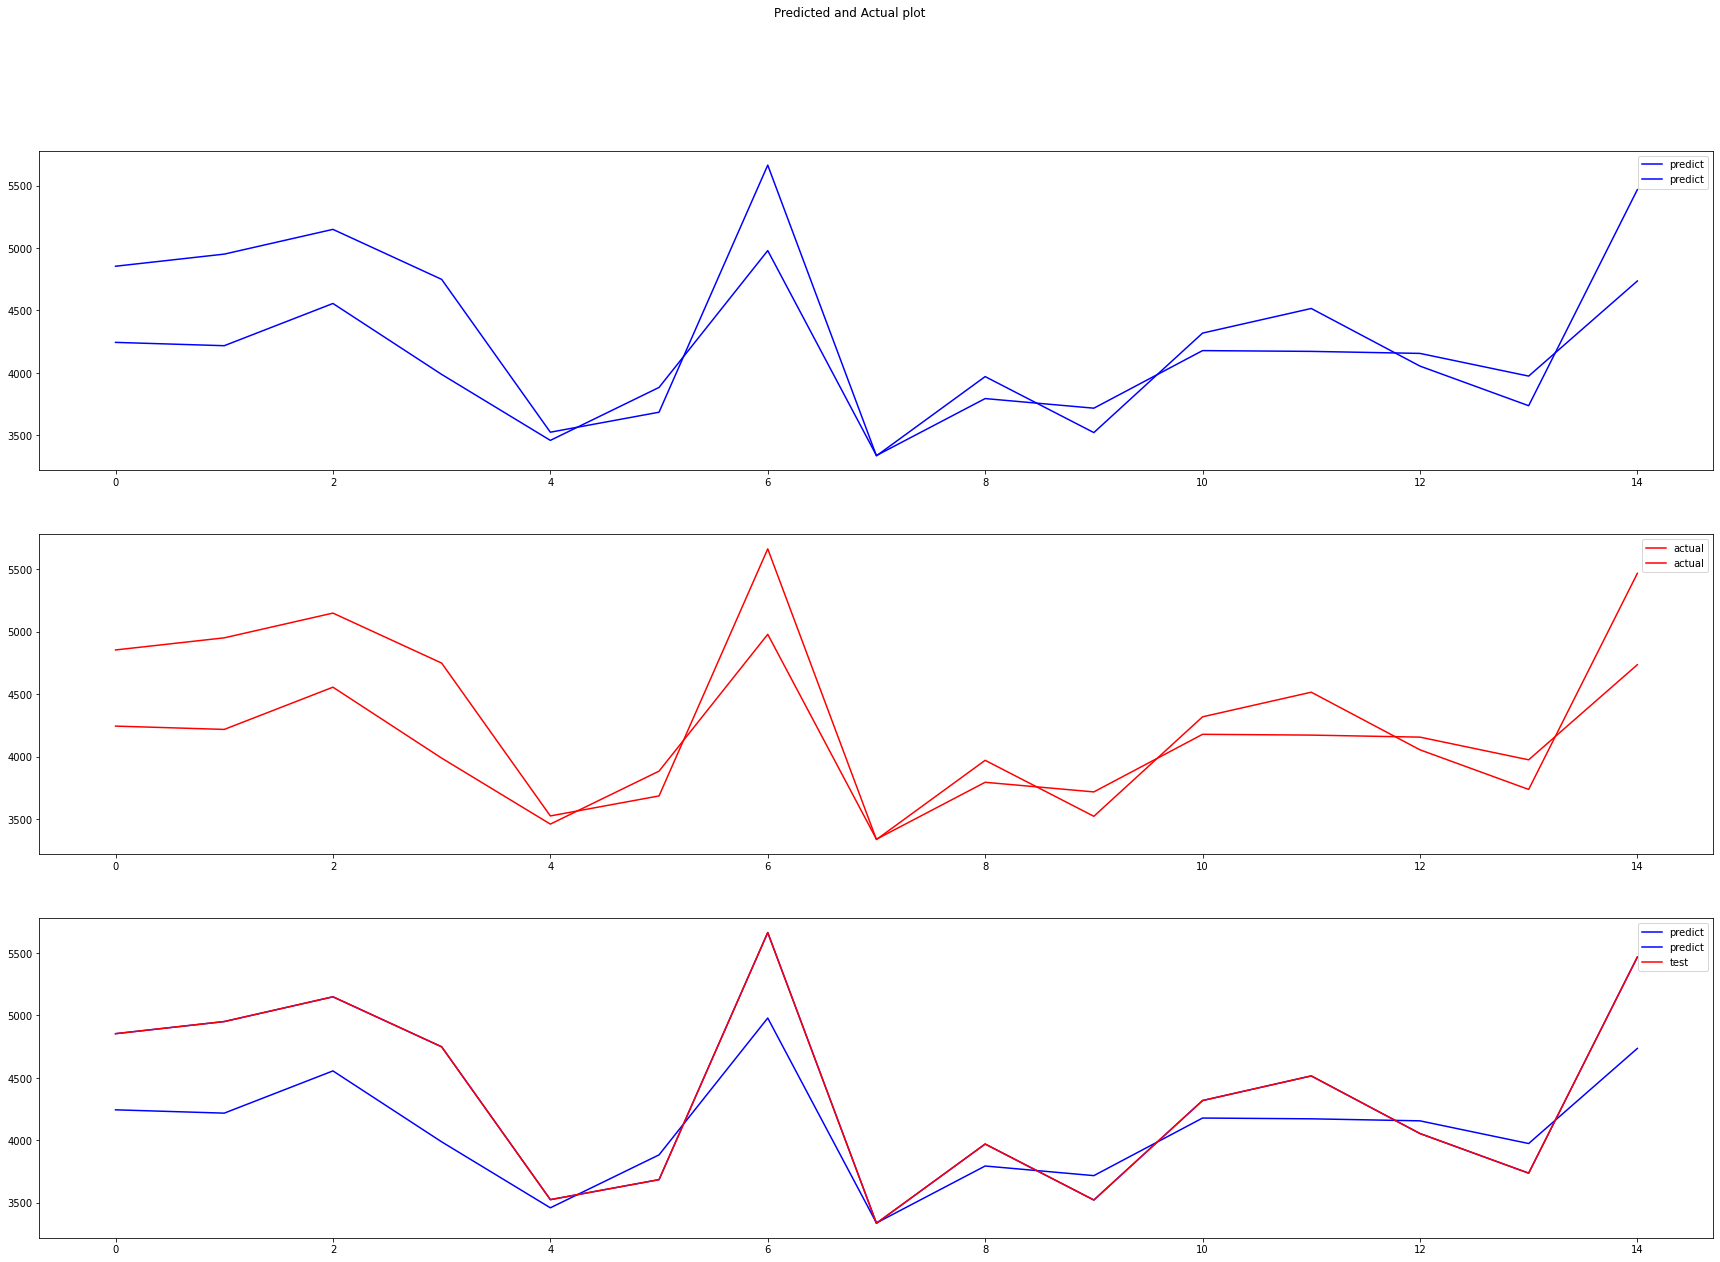

In [23]:
visualization(ind_df_pred)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print("MAPE: ", np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

In [ ]:
mean_absolute_percentage_error(y_test, ind_predictions)

In [ ]:
# use min_max scaler to scale data
# max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
residential_numeric_minmax = max_abs_scaler.fit_transform(residential_numeric_features)

In [ ]:
df_residential_numeric = pd.DataFrame(residential_numeric_minmax, columns=numeric_feature_name)

In [ ]:
df_residential_numeric

In [ ]:
# concatenate the new numeric value and the categorical value
df_residential_train = pd.concat([residential_categorical_features, df_residential_numeric, residential_y_val], axis=1)



In [ ]:
# the input into the regression function
regr_residential = df_residential_train.drop(['Year', 'Month', 'Season_Spring'],axis = 1)

In [ ]:
#Train-Test Split
train, test = train_test_split(regr_residential, test_size=0.2)

X_train = train.drop(['residential_usage'],axis = 1)
y_train = train.residential_usage
X_test = test.drop(['residential_usage'],axis = 1)
y_test = test.residential_usage

In [ ]:
X_train

In [ ]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

In [ ]:
def cal_vif(df):
    features= df[['Cents/kWh', 'CLDD', 'AWND', 'HTDD', 'Population']]
    X = add_constant(features)
    vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    
    return vif

In [ ]:
cal_vif(df_residential_train)

In [ ]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    
    return df_pred

In [ ]:
sm_regression(X_train, y_train, X_test, y_test)

In [ ]:
K = 5
model = XGBRegressor(objective ='reg:squarederror')
scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error', verbose=False)
avg_rmse = math.sqrt(abs(np.mean(scores)))

print('Average RMSE with {}-fold Cross Validation: {:.3f}'.format(K, avg_rmse))

In [ ]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(model, height=0.8, ax=ax)

In [ ]:
res_lr = LinearRegression()
res_lr.fit(X_train, y_train)
res_predictions = res_lr.predict(X_test)
evaluate_performances(y_test, res_predictions)
res_df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': res_predictions})
visualize_graph(res_df_pred)

In [ ]:
a  = res_lr.intercept_#截距
b = res_lr.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

In [ ]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

In [ ]:
visualization(res_df_pred)